<h1 align="center">Volume 3: Data Augmentation.</h1>

    Leeman Woodside
    Section #
    10.19.2021

In [217]:
import matplotlib.pyplot as plt
from imageio import imread
import numpy as np
%matplotlib inline
import librosa
import librosa.effects
import librosa.beat
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KDTree
from sklearn import datasets
from sklearn.metrics import classification_report

<h2 align="center">Image Augmentation</h2>

<h3 align="center">Problem 1</h3>

In [135]:
def translate(images, A, B): 
    """Returns each image translated by a random amount (a,b), where
    a~Uniform(-A,A) and b~Uniform(-B,B). The resulting image should be cropped
    to be of size (d1,d2). Note that this translation will leave a border on
    two sides of the image. Fill the empty border with the parts that were cropped
    off the opposite sides.
        Parameters:
            images (d1,d2): d1 x d2 array 
            A (float): horizontal translation parameter
            B (float): vertical translation parameter
        Returns:
            translated_image (d1,d2): array of translated images
    """
    a = np.random.uniform(-A, A)
    b = np.random.uniform(-B, B)
    d1, d2 = images.shape
    coords = np.mgrid[0:d1, 0:d2].reshape((2,d1*d2))
    translate_matrix = np.array([[a], [b]])
    
    new_coords = translate_matrix + coords
    # some transformations will return entries as floats, but we need them to ←-
    # be integers because they are coordinates
    new_coords = new_coords.astype(int)
    # the next two steps apply the transformation to the image
    x, y = new_coords.reshape((2, d1, d2), order='F')
    translate_image = np.take(images, x+d1*y, mode='wrap').reshape((d1, d2))
    
    return translate_image
    
    
def rotate(images, theta): 
    """ Returns an image rotated by a random amount t~Uniform(-theta,theta).
    The resulting image should be cropped to be the same size as the original,
    and any blank parts should be filled with one of the parts cropped off the
    other side.
        Parameters:
            images (d1,d2): d1 x d2 array
            theta (float): largest acceptable rotation angle
        Returns:
            rotated_image (d1,d2): array of rotated image
    """
    t = np.random.uniform(-theta, theta)
    d1, d2 = images.shape
    coords = np.mgrid[0:d1, 0:d2].reshape((2,d1*d2))
    rotate_matrix = np.array([[np.cos(t), np.sin(t)], [-np.sin(t), np.cos(t)]])
    
    new_coords = rotate_matrix @ coords
    # some transformations will return entries as floats, but we need them to ←-
    # be integers because they are coordinates
    new_coords = new_coords.astype(int)
    # the next two steps apply the transformation to the image
    x, y = new_coords.reshape((2, d1, d2), order='F')
    rotate_image = np.take(images, x+d1*y, mode='wrap').reshape((d1, d2))
    
    return rotate_image
    
def skew(images, A): 
    """ Returns an image with the linear transformation [[1,a],[0,1]] applied,
    where a~Uniform(-A,A). Crop the parts that go outside the image boundaries
    and fill missing areas with the appropriate cropped piece.
        Parameters:
            images (d1,d2): d1 x d2 array
            A (float): skew parameter
        Returns:
            skewed_image (d1,d2): array of skewed image
    """
    a = np.random.uniform(-A, A)
    d1, d2 = images.shape
    coords = np.mgrid[0:d1, 0:d2].reshape((2,d1*d2))
    skew_matrix = np.array([[1, a], [0, 1]])
    
    new_coords = skew_matrix @ coords
    # some transformations will return entries as floats, but we need them to ←-
    # be integers because they are coordinates
    new_coords = new_coords.astype(int)
    # the next two steps apply the transformation to the image
    x, y = new_coords.reshape((2, d1, d2), order='F')
    skew_image = np.take(images, x+d1*y, mode='wrap').reshape((d1, d2))
    
    return skew_image    

def flip_horizontal(images):
    """Flip horizontal. Returns a horizontally flipped version of each image.
        Parameters:
            images (d1,d2): d1 x d2 image array 
        Returns:
            flipped_image (d1,d2): array of flipped image
    """
    d1, d2 = images.shape
    coords = np.mgrid[0:d1, 0:d2].reshape((2,d1*d2))
    flip_horizontal_matrix = np.array([[-1, 0], [0, 1]])
    
    new_coords = flip_horizontal_matrix @ coords
    # some transformations will return entries as floats, but we need them to ←-
    # be integers because they are coordinates
    new_coords = new_coords.astype(int)
    # the next two steps apply the transformation to the image
    x, y = new_coords.reshape((2, d1, d2), order='F')
    flip_horizontal_image = np.take(images, x+d1*y, mode='wrap').reshape((d1, d2))
    
    return flip_horizontal_image 
    
def gauss_noise(images, sigma2): 
    """Adds Gaussian noise with parameter sigma2. For each image draw d1xd2 random
    noise values from N(0,sigma2) and add those to the original image.
        Parameters:
            images (d1,d2): d1 x d2 array 
        Returns:
            noisy_image: array of noisy image
    """
    d1, d2 = images.shape
    coords = np.mgrid[0:d1, 0:d2].reshape((2,d1*d2))
    gauss_noise_matrix = np.random.normal(0,sigma2, size=(2,d1*d2))
    
    new_coords = gauss_noise_matrix + coords
    # some transformations will return entries as floats, but we need them to ←-
    # be integers because they are coordinates
    new_coords = new_coords.astype(int)
    # the next two steps apply the transformation to the image
    x, y = new_coords.reshape((2, d1, d2), order='F')
    gauss_noise_image = np.take(images, x+d1*y, mode='wrap').reshape((d1, d2))
    
    return gauss_noise_image 
    

<function matplotlib.pyplot.show(close=None, block=None)>

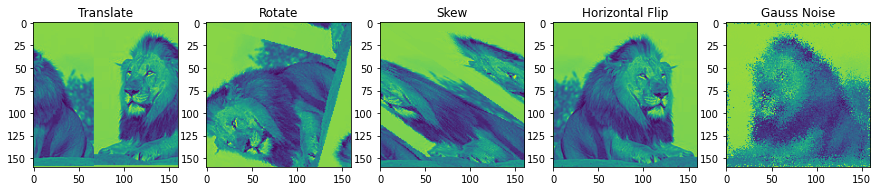

In [136]:
lion = imread('lion.png')
trans_lion = translate(lion, 200, 2)
rot_lion = rotate(lion, 4)
skew_lion = skew(lion, 2)
flip_hor_lion = flip_horizontal(lion)
lion_of_gauss = gauss_noise(lion, 3)

fig, axs = plt.subplots(1, 5, figsize=(15,15))
axs[0].imshow(trans_lion, )
axs[0].set_title("Translate")
axs[1].imshow(rot_lion)
axs[1].set_title("Rotate")
axs[2].imshow(skew_lion)
axs[2].set_title("Skew")
axs[3].imshow(flip_hor_lion)
axs[3].set_title("Horizontal Flip")
axs[4].imshow(lion_of_gauss)
axs[4].set_title("Gauss Noise")
plt.show

<h3 align="center"> Problem 2 </h3>
Take the sklearn digits dataset, make an 80-20 train-test split, then apply 
each of your transformations to the entire training set. You must decide good 
values of each of the parameters to use---justify each choice.
This should give you a larger (augmented) training set with roughly 8,600 
training points. Fit a random forest to the augmented training set and to the 
original training set and return the results of each on the test set. 

In [140]:
def image_augment(X,Y,parameters):
    """ transform the images using the functions above. 
    Parameters:
        X (N,d1,d2): array containing N images of dimension d1 x d2
        Y (N,): Labels/values for each image
        parameters: List of parameter values [A,B,theta,A,sigma2]
    Returns:
        augmented_X (6N,d1,d2): original and transformed data in one array 
        augmented_Y (6N): corresponding labels/values
    """
    A = parameters[0]
    B = parameters[1]
    theta = parameters[2]
    A2 = parameters[3]
    sigma2 = parameters[4]
    
    tran = translate(X, A, B)
    rot = rotate(X, theta)
    sku = skew(X, A2)
    flip_h = flip_horizontal(X)
    gauss = gauss_noise(X, sigma2)

    augmented_X = np.vstack((X, tran, rot, sku, flip_h, gauss))
    augmented_Y = np.hstack((Y, Y, Y, Y, Y, Y))
    
    return augmented_X, augmented_Y

In [211]:
params = [50, 8, 9, 200, 30]

digits = datasets.load_digits()
X = digits.data
y = digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y)

modified_X_train = X_train.reshape((86208,-1))

augmented_X, augmented_Y = image_augment(modified_X_train, y_train, params)
# print(augmented_X.shape)
# print(augmented_Y.shape)
# print(X.shape)


#reshape
# X_train = X_train.reshape(86208, 64)
augmented_X = augmented_X.reshape((8082, 64))

rf = RandomForestClassifier().fit(X_train, y_train)

aug_rf = RandomForestClassifier().fit(augmented_X, augmented_Y)

print("Non-augmented accuracy: ", rf.score(X_test, y_test))
print("Augmented accuracy: ", aug_rf.score(X_test, y_test))

Non-augmented accuracy:  0.9755555555555555
Augmented accuracy:  0.9777777777777777


<h2 align="center">Audio Augmentation</h2>

<h3 align="center"> Problem 3 </h3>
The file music.npy contains the audio time series data from 10 second clips of 150 different songs, with style.npy describing the associated style of ballroom dance. The styles included are Chacha, Foxtrot, Jive, Samba, Rumba, and Waltz. Use train_test_split
from sklearn.model_selection with test_size=.5 to create train and test sets. Create two training sets by augmenting this original training set. Each new augmented
training set will include the original data and the augmented data. For the first, add ambient
noise from the file restaurant-ambience.wav. For the second, use time_stretch.

In [155]:
def prob3():
    X = np.load('music.npy')    
    y = np.load('styles.npy')
    amb, sr = librosa.load('restaurant-ambience.wav')
    
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.5)

    diff = abs(len(X[0]-len(amb)))
    start = np.random.randint(0,diff)
    noise = amb[start:start+len(X_train[0])] + X_train
    noise = np.vstack((X_train,noise))

    #time_stretched
    stretch = np.apply_along_axis(librosa.effects.time_stretch,1,X_train,rate=np.random.rand())[:,:len(X_train[0])]
    stretch = np.vstack((X_train,stretch))
    
    return X_train,X_test,y_train,y_test,noise,stretch

<h3 align="center"> Problem 4</h3>

Do the following steps 5 times:

• Use the original data set and the augmented data sets to fit three RandomForestClassifiers,
one only on the original data, one on the original data and the data with ambient noise
added, and one on the original data and the time stretched data.

• Score each classifier.

Print the mean score for each of the classifiers and print the standard deviation for the scores.


In [230]:
def prob4():
    orig, aug_1, aug_2 = [], [], []
    
    for i in range(5):
        X_train, X_test, y_train, y_test, noise, stretch = prob3()
        
        aug_y = np.hstack((y_train, y_train))

        X_train, X_test = np.apply_along_axis(librosa.beat.plp,1,X_train),np.apply_along_axis(librosa.beat.plp,1,X_test)
        noise, stretch = np.apply_along_axis(librosa.beat.plp,1,noise),np.apply_along_axis(librosa.beat.plp,1,stretch)
        orig_rf = RandomForestClassifier().fit(X_train, y_train)
        noise_rf = RandomForestClassifier().fit(noise, aug_y)
        stretch_rf = RandomForestClassifier().fit(stretch,aug_y)
        
        orig.append(orig_rf.score(X_test, y_test))
        aug_1.append(noise_rf.score(X_test, y_test))
        aug_2.append(stretch_rf.score(X_test, y_test))
        
    orig,aug_1,aug_2 = np.array(orig),np.array(aug_1),np.array(aug_2)

    return orig,aug_1,aug_2 

In [ ]:
orig, amb, time = prob4()

In [ ]:
print('\t\t Mean \t STD')
print('Original','\t',np.round(orig.mean(), 3),'\t',np.round(orig.std(), 3))
print('Ambient Noise','\t',np.round(amb.mean(), 3),'\t',np.round(amb.std(), 3))
print('Time Stretch:','\t',np.round(time.mean(), 3),'\t', np.round(time.std(), 3))

<h2 align="center">SMOTE</h2>

<h3 align="center"> Problem 5 </h3>

Write a function that uses the synthetic minority oversampling technique to augment an imbalanced data set.
Your function should have the following characteristics:

Accept $X$, a matrix of minority class samples
       $N$, the number of samples to generate per original point
       $k$, the number of nearest neighbors.

For each original point in the sample, pick one of the $k$ nearest neighbors at random and generate a new point that lies between the two original values. 

Return an array containing the synthetic samples.


In [226]:
def smote(X,N,k):
    """ Generate synthetic points using the SMOTE method. Hint! Use KDTree :)
    Parameters:
        X (n,m): minority class samples
        N (int): number of samples to generate from each point
        k (int): number of nearest neighbors
    Returns:
        synthetic ndarray(N*n,m): synthetic minority class samples
    """
    synthetic_pnts = []
    kd_tree = KDTree(X)
    for x in X:
        dist, nns = kd_tree.query(x.reshape(1, -1), k)
        nn = np.random.choice(nns[0])
        for i in range(N):
            new_point = np.array([np.random.uniform(min(x[j], X[nn,j]), max(x[j], X[nn,j])) for j in range(len(x))])
            synthetic_pnts.append(new_point)
    return synthetic_pnts

<h3 align="center"> Problem 6 </h3>

The dataset found in creditcard.npy contains information about credit card purchases made over a two day period. 
Of the approximately 285,000 observations, 492 are fraudulent purchases. 
The last column indicates if the purchase was valid (0) or fraudulent (1). 

Do the following steps 10 times:

• Create a training and test set from the data using train_test_split from sklearn.
model_selection with test_size=.7.

• Use smote with N = 500 and k = 2 to augment the training set.

• Create two Gaussian Naïve Bayes classifiers (from sklearn.naive_bayes.GaussianNB),
one which wil be trained on only the original data and the other on the SMOTE augmented
data and the original data.

• Fit each classifier and find the recall and accuracy of each model.

Print the mean recall and mean accuracy of each model and and describe the findings.

In [227]:
def prob6():
    data = np.load('creditcard.npy')

    X = data[:,:-1]
    y = data[:,-1] 
    orig, aug_orig, orig_re, aug_re = [], [], [], []
    
    for i in range(10):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.7)
        fraud = X_train[y_train==1]

        smotethed = smote(fraud, 500, 2)
        smote_y = np.ones(len(smotethed))
        
        orig_gauss = GaussianNB().fit(X_train, y_train)
        aug_gauss = GaussianNB().fit(np.vstack((X_train, smotethed)), np.hstack((y_train, smote_y)))
        
        orig_pred = orig_gauss.predict(X_test)
        aug_pred = aug_gauss.predict(X_test)
        
        orig.append(classification_report(y_test, orig_pred, output_dict=True)['accuracy'])        
        aug_orig.append(classification_report(y_test, aug_pred, output_dict=True)['accuracy'])
        
        orig_re.append(classification_report(y_test, orig_pred, output_dict=True)['0.0']['recall'])        
        aug_re.append(classification_report(y_test, aug_pred, output_dict=True)['1.0']['recall'])
        
    return orig, aug_orig, orig_re, aug_re

In [228]:
orig, aug_orig, orig_re, aug_re = prob6()

In [229]:
mean_orig_recall = np.mean(orig_re)
mean_orig_score = np.mean(orig)
mean_smote_recall = np.mean(aug_re)
mean_smote_score = np.mean(aug_orig)

print('\t\t Recall \t Accuracy')
print('Original','\t',np.round(mean_orig_recall,5),'\t', np.round(mean_orig_score,5))
print('SMOTE', '\t\t', np.round(mean_smote_recall,5), '\t', np.round(mean_smote_score,5))

		 Recall 	 Accuracy
Original 	 0.99326 	 0.99268
SMOTE 		 0.76378 	 0.99116
